In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
symbols=['IVV','TLT','EWJ','EWY','EWG','VUSA.AS','EWC','EWZ','EMB','EWS','3115.HK','EWA','EWU','ENOR']
start = datetime.datetime(2017, 1, 3)
end = datetime.datetime(2022, 11, 10)

df = yf.download(symbols, start=start, end=end)
prices=df['Adj Close']
prices.head()

[*********************100%***********************]  14 of 14 completed


,3115.HK,EMB,ENOR,EWA,EWC,EWG,EWJ,EWS,EWU,EWY,EWZ,IVV,TLT,VUSA.AS
Date,,,,,,,,,,,,,,
2017-01-03,79.449997,84.724777,18.734844,16.087889,23.416159,22.801809,44.962105,16.116692,24.814657,49.223480,27.356323,204.073303,105.731796,41.057999
2017-01-04,79.099998,85.253395,18.939600,16.291039,23.807911,22.939486,45.865730,16.372892,25.056282,49.560566,27.634174,205.307175,106.138321,41.132999
2017-01-05,80.449997,85.912148,19.195538,16.447308,23.985985,23.189013,46.130436,16.685141,25.225416,50.052521,27.959654,205.118118,107.799774,40.596001
2017-01-06,80.650002,85.866211,19.152885,16.361359,23.941465,23.111570,46.057415,16.581053,25.064335,49.505901,27.673866,205.928696,106.809998,40.945999
2017-01-09,80.849998,85.766609,18.905472,16.541065,23.772301,23.085760,46.103043,16.709158,24.862986,49.414799,27.665926,205.262177,107.667198,40.868000


In [40]:
returns = pd.DataFrame()
for stock in symbols:
    returns[stock] = (prices[stock] - prices[stock].shift(1))/prices[stock].shift(1)
returns = returns.dropna().round(4)
returns.head()

,IVV,TLT,EWJ,EWY,EWG,VUSA.AS,EWC,EWZ,EMB,EWS,3115.HK,EWA,EWU,ENOR
Date,,,,,,,,,,,,,,
2017-01-04,0.0060,0.0038,0.0201,0.0068,0.0060,0.0018,0.0167,0.0102,0.0062,0.0159,-0.0044,0.0126,0.0097,0.0109
2017-01-05,-0.0009,0.0157,0.0058,0.0099,0.0109,-0.0131,0.0075,0.0118,0.0077,0.0191,0.0171,0.0096,0.0068,0.0135
2017-01-06,0.0040,-0.0092,-0.0016,-0.0109,-0.0033,0.0086,-0.0019,-0.0102,-0.0005,-0.0062,0.0025,-0.0052,-0.0064,-0.0022
2017-01-09,-0.0032,0.0080,0.0010,-0.0018,-0.0011,-0.0019,-0.0071,-0.0003,-0.0012,0.0077,0.0025,0.0110,-0.0080,-0.0129
2017-01-10,-0.0004,-0.0007,-0.0038,0.0042,-0.0004,0.0001,0.0015,0.0115,-0.0016,0.0096,0.0080,0.0019,0.0032,-0.0045


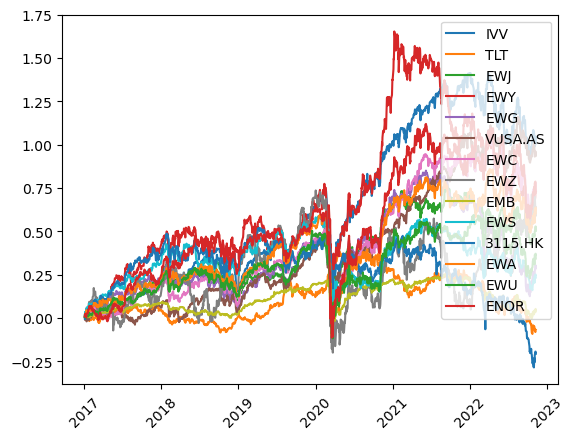

In [41]:
cum_returns = (returns+1).cumprod(axis=0)-1
plt.plot(cum_returns)
plt.legend(symbols)
plt.xticks(rotation = 45)
plt.show()

In [42]:
describe_table = returns.describe(percentiles = [0.01,0.1,0.25,0.5,0.75,0.9,0.99]).iloc[1:,:]
mean_std = describe_table.iloc[0:2,:]
percentiles = describe_table.iloc[3:-1,:]

moments = pd.concat([returns.skew(axis=0),returns.kurtosis(axis=0)], axis = 1)
moments.columns = ('skewness', 'kurtosis')
moments = moments.T

describe_stats = pd.concat([mean_std, moments, percentiles]).round(4)
describe_stats

,IVV,TLT,EWJ,EWY,EWG,VUSA.AS,EWC,EWZ,EMB,EWS,3115.HK,EWA,EWU,ENOR
mean,0.0006,-0.0000,0.0004,0.0006,0.0003,0.0006,0.0005,0.0007,0.0001,0.0002,-0.0001,0.0005,0.0003,0.0006
std,0.0128,0.0096,0.0105,0.0164,0.0144,0.0111,0.0132,0.0246,0.0070,0.0120,0.0135,0.0160,0.0131,0.0165
skewness,-0.6709,0.2405,-0.7929,-0.6808,-0.8004,-0.5799,-1.0034,-1.0221,-3.2182,-0.6946,-0.0567,-0.8443,-0.9896,-1.0966
kurtosis,15.1766,8.3894,10.4885,11.6698,13.3066,7.3464,28.2768,13.8829,42.5717,9.6166,3.9074,25.7808,17.2579,15.0156
1%,-0.0367,-0.0231,-0.0306,-0.0425,-0.0402,-0.0338,-0.0338,-0.0587,-0.0177,-0.0323,-0.0373,-0.0403,-0.0378,-0.0456
10%,-0.0112,-0.0105,-0.0107,-0.0175,-0.0135,-0.0108,-0.0116,-0.0255,-0.0052,-0.0123,-0.0161,-0.0129,-0.0115,-0.0163
25%,-0.0035,-0.0054,-0.0046,-0.0080,-0.0057,-0.0043,-0.0047,-0.0117,-0.0021,-0.0054,-0.0068,-0.0060,-0.0049,-0.0065
50%,0.0009,0.0001,0.0006,0.0006,0.0007,0.0012,0.0010,0.0016,0.0004,0.0004,0.0005,0.0008,0.0008,0.0012
75%,0.0062,0.0051,0.0058,0.0100,0.0070,0.0064,0.0064,0.0136,0.0026,0.0064,0.0070,0.0072,0.0062,0.0088
90%,0.0127,0.0103,0.0120,0.0180,0.0142,0.0119,0.0130,0.0265,0.0054,0.0124,0.0145,0.0138,0.0124,0.0167


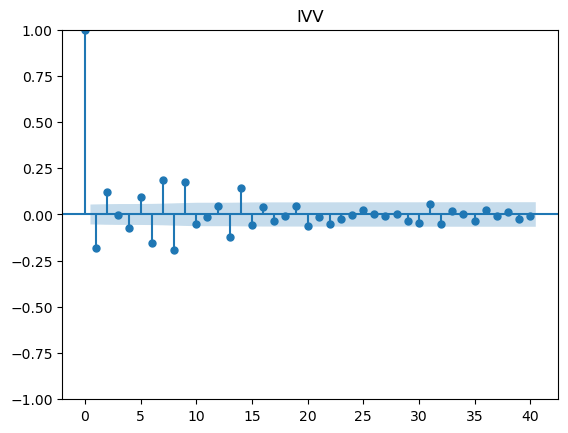

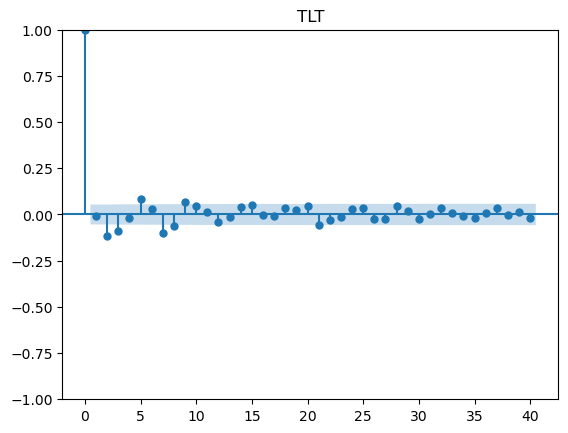

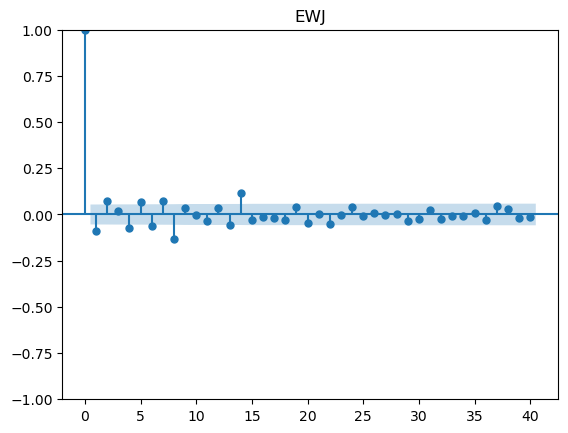

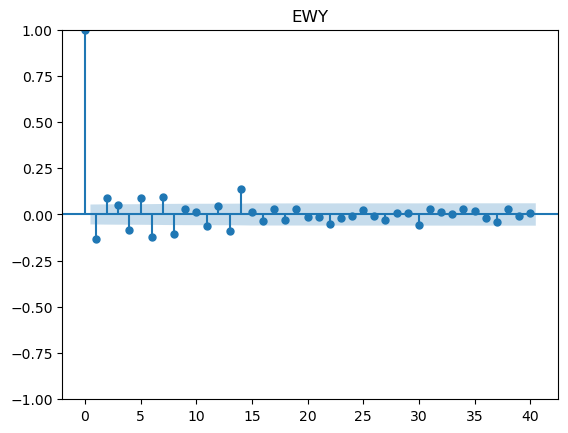

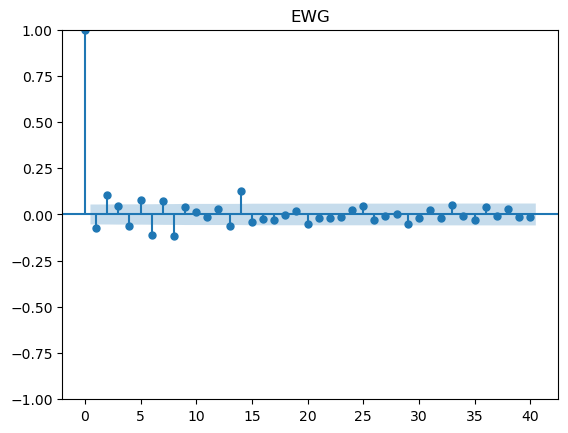

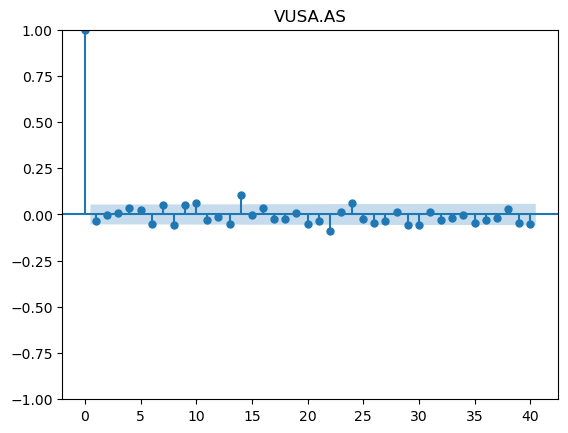

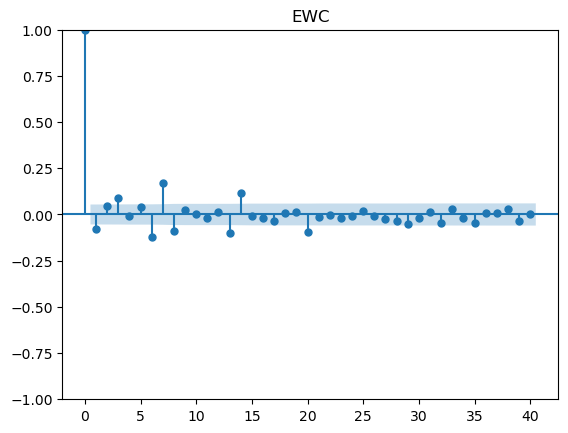

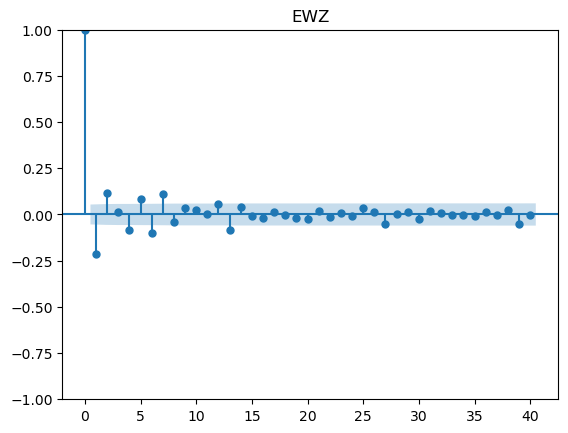

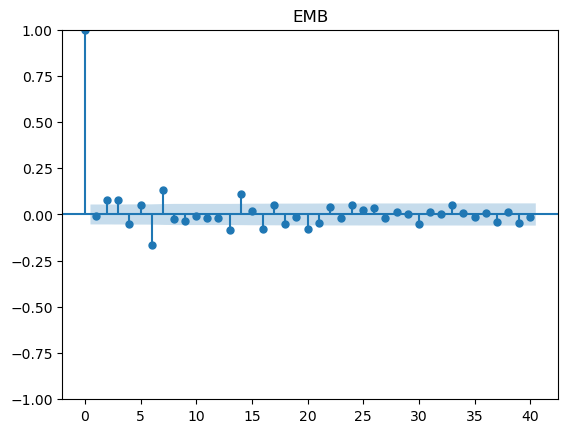

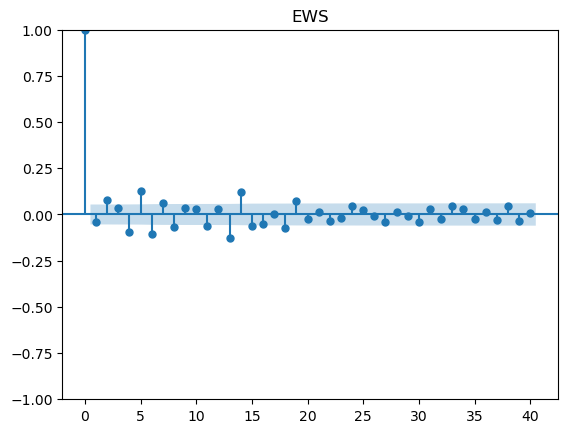

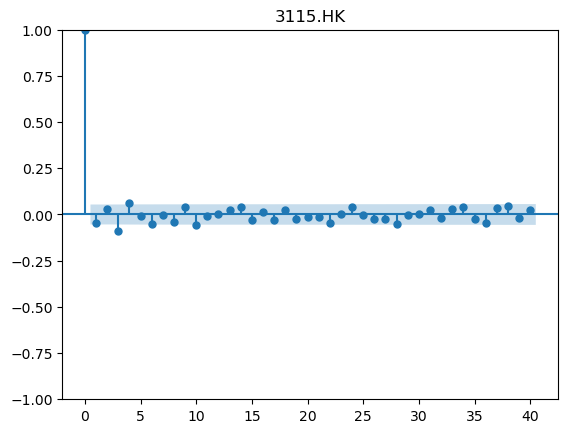

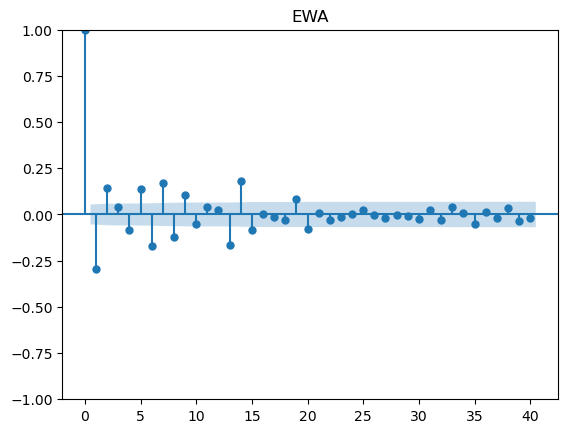

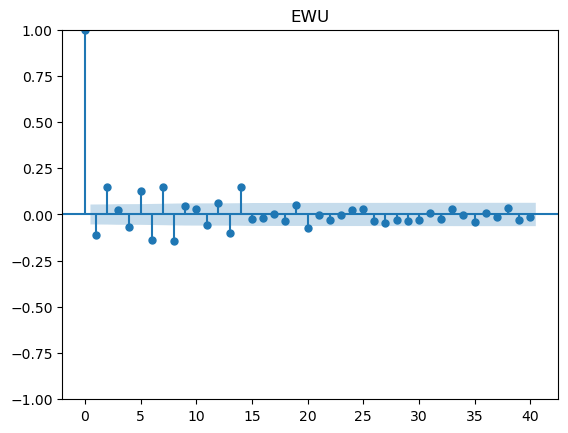

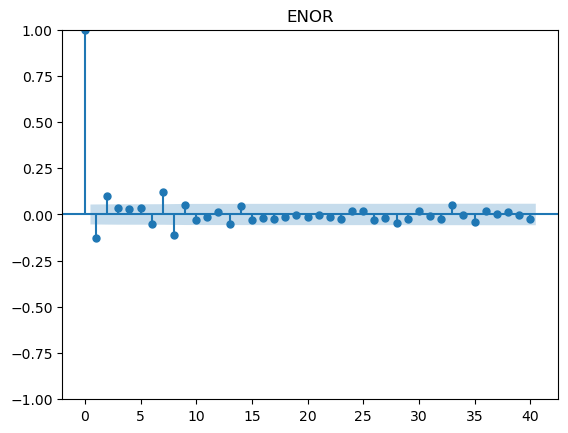

In [43]:
for stock in symbols:
    sm.graphics.tsa.plot_acf(returns[stock], lags = 40)
    plt.title(label = stock)
    plt.show()

The singular values are  [1.56048675 0.59425707 0.49108734 0.37064795 0.34598777 0.32485119
 0.25730877 0.25103128 0.21743828 0.20268037 0.19561962 0.17235185
 0.15057442 0.1332228 ]


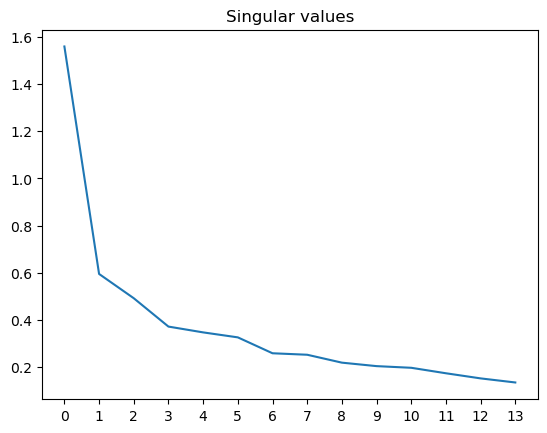

In [44]:
U, S, VT = np.linalg.svd(returns)
V = VT.transpose()
print("The singular values are ", S)
plt.plot(S)
plt.xticks(np.arange(0, len(symbols), 1))
plt.title("Singular values")
plt.show()

var_explained =  [0.655 0.095 0.065 0.037 0.032 0.028 0.018 0.017 0.013 0.011 0.01  0.008
 0.006 0.005]
cumulative variance explained =  [0.655 0.75  0.815 0.852 0.884 0.912 0.93  0.947 0.96  0.971 0.981 0.989
 0.995 1.   ]


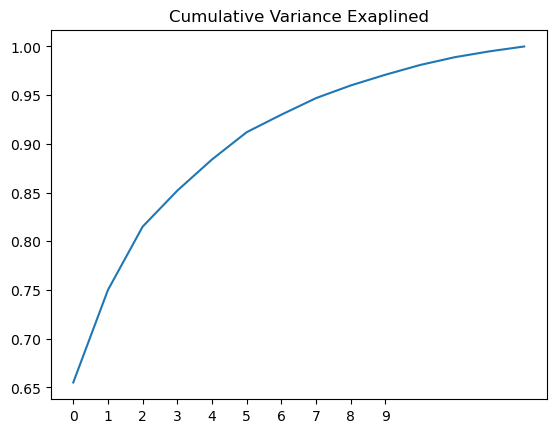

In [45]:
var_explained = np.round(S**2/np.sum(S**2), decimals=3)
print('var_explained = ', var_explained)
print('cumulative variance explained = ', var_explained.cumsum())

plt.plot(var_explained.cumsum())
plt.title("Cumulative Variance Exaplined")
plt.xticks(np.arange(0, 10, 1))
plt.show()

In [46]:
cut_off = 5

In [47]:
for i in range(cut_off):
    print("Singular Vector ", i+1)
    print(pd.DataFrame(V[i], index = symbols, columns = ['V['+str(i)+']']))
    print()

Singular Vector  1
             V[0]
IVV     -0.262542
TLT      0.112293
EWJ     -0.190718
EWY      0.023043
EWG     -0.056356
VUSA.AS  0.284044
EWC     -0.072651
EWZ      0.104169
EMB      0.058771
EWS      0.226777
3115.HK  0.439579
EWA     -0.590202
EWU     -0.417978
ENOR     0.102061

Singular Vector  2
             V[1]
IVV      0.062491
TLT     -0.043846
EWJ      0.038599
EWY     -0.589323
EWG      0.699399
VUSA.AS  0.096723
EWC      0.054706
EWZ      0.017255
EMB     -0.019609
EWS      0.078941
3115.HK -0.048505
EWA      0.005252
EWU     -0.065110
ENOR     0.361027

Singular Vector  3
             V[2]
IVV     -0.201244
TLT      0.121513
EWJ     -0.055129
EWY     -0.108378
EWG     -0.065888
VUSA.AS  0.135872
EWC     -0.277425
EWZ     -0.082286
EMB     -0.082835
EWS      0.813019
3115.HK -0.107375
EWA      0.313572
EWU      0.141883
ENOR    -0.159884

Singular Vector  4
             V[3]
IVV     -0.318638
TLT      0.180912
EWJ      0.254762
EWY     -0.480603
EWG     -0.429612
VUS

In [48]:
factors = pd.DataFrame(index = returns.index)
for i in range(cut_off):
    factor = (1/np.sqrt(S[i])) * np.matmul(np.asarray(returns), V[i].transpose())
    factors['F'+str(i)] = factor

In [49]:
factors

,F0,F1,F2,F3,F4
Date,,,,,
2017-01-04,-0.010523,0.009280,0.011782,0.010931,-0.031646
2017-01-05,0.002114,0.007296,0.014295,-0.007729,-0.013268
2017-01-06,0.003889,0.005517,-0.007642,0.008963,0.006125
2017-01-09,-0.000142,-0.005664,0.020025,0.000826,-0.005780
2017-01-10,0.003738,-0.005225,0.010381,-0.008080,-0.014595
...,...,...,...,...,...
2022-11-03,-0.001829,-0.020891,-0.020020,-0.007400,-0.007738
2022-11-04,-0.021921,0.040930,0.011057,-0.050561,-0.054688
2022-11-07,0.005733,0.000194,-0.006930,-0.009939,0.017677


In [50]:
for stock in symbols:
    y = returns[stock]
    x = sm.add_constant(factors)
    model = sm.OLS(y,x).fit()
    print(model.summary())
    

                            OLS Regression Results                            
Dep. Variable:                    IVV   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     1221.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:50:10   Log-Likelihood:                 5023.2
No. Observations:                1319   AIC:                        -1.003e+04
Df Residuals:                    1313   BIC:                        -1.000e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.346      0.1

                            OLS Regression Results                            
Dep. Variable:                VUSA.AS   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     200.5
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          6.79e-159
Time:                        13:50:11   Log-Likelihood:                 4441.9
No. Observations:                1319   AIC:                            -8872.
Df Residuals:                    1313   BIC:                            -8841.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.501      0.1

                            OLS Regression Results                            
Dep. Variable:                    EWU   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1098.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:50:11   Log-Likelihood:                 4934.2
No. Observations:                1319   AIC:                            -9856.
Df Residuals:                    1313   BIC:                            -9825.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.52e-05      0.000     -0.096      0.9